In [1]:
%matplotlib inline

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from moseq2_viz.model.util import (get_transition_matrix,
                                   parse_model_results,
                                   relabel_by_usage)
from moseq2_viz.util import parse_index
from moseq2_viz.scalars.util import scalars_to_dataframe
from moseq2_viz.model.dist import get_behavioral_distance

In [3]:
sns.set_style('white')
sns.set_context('notebook')

## Load in the data

In [4]:
# load in the model and the index to the extracted data

index_file = '/n/groups/datta/Jeff/scratch/test_data/moseq2-index.yaml'
model_file = '/n/groups/datta/Jeff/scratch/test_data/mymodel.p'

model_results = parse_model_results(model_file)
index, sorted_index = parse_index(index_file)

## Behavioral distance

In [5]:
# retrieves behavioral distance using AR matrices

dist = get_behavioral_distance(sorted_index, 
                               model_file, 
                               distances=['ar[init]'], 
                               max_syllable=None)

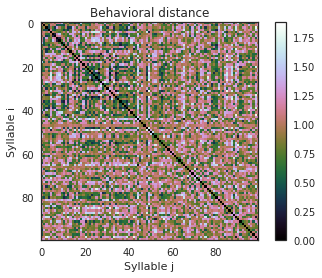

In [6]:
fig, ax = plt.subplots(1)
h =ax.imshow(dist['ar[init]'], aspect='equal', cmap='cubehelix')
ax.set_title('Behavioral distance')
ax.set_xlabel('Syllable j')
ax.set_ylabel('Syllable i')
plt.colorbar(h, ax=ax)
plt.show()

## Loading in scalars and model labels as a dataframe

In [7]:
# packs data into a dataframe, including all scalars and model labels (note that -5 is a fill value, ignore for all downstream analysis)

df = scalars_to_dataframe(sorted_index, include_model=model_file)
uuid = df['uuid'].unique()[0] # uuid for the first session

100%|██████████| 2/2 [00:00<00:00,  4.70it/s]


In [8]:
df

,centroid_x_px,centroid_y_px,velocity_2d_px,velocity_3d_px,width_px,length_px,area_px,centroid_x_mm,centroid_y_mm,velocity_2d_mm,...,area_mm,height_ave_mm,angle,velocity_theta,SessionName,SubjectName,StartTime,model_label,group,uuid
0,194.652191,56.223106,0.000000,0.000000,19.844297,46.035313,708.0,-99.378105,-258.967560,0.000000,...,1161.940674,25.440678,2.038906,0.000000,test,mouse1,2018-05-03T10:20:15.5562372-04:00,-5,default,c89bbf91-b589-450f-b4b6-118310b1dc25
1,194.652191,56.223106,0.000000,0.000000,19.844297,46.035313,708.0,-99.378105,-258.967560,0.000000,...,1161.940674,25.440678,2.038906,0.000000,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
2,193.401917,55.737518,1.341262,1.350208,19.288174,44.555031,683.0,-101.403450,-259.774841,2.180304,...,1120.927246,25.285505,2.074157,-2.762303,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
3,192.212173,56.377441,1.350922,1.551100,18.899508,45.294044,692.0,-103.330727,-258.710999,2.201399,...,1135.695312,26.047688,2.132008,2.637221,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
4,191.420242,56.547749,0.810037,0.883097,18.747181,44.307434,666.0,-104.613586,-258.427887,1.313728,...,1093.014526,26.399399,2.181682,2.924386,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
5,190.732773,56.880753,0.763876,0.943113,19.051195,44.691788,683.0,-105.727219,-257.874268,1.243652,...,1120.911621,25.846266,2.246425,2.680244,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
6,190.514771,57.243896,0.423555,1.128154,19.191334,43.907742,666.0,-106.080368,-257.270569,0.699405,...,1093.011963,26.891891,2.285146,2.100096,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
7,190.454422,57.628777,0.389583,0.426711,19.320133,44.005592,682.0,-106.178131,-256.630737,0.647257,...,1119.273071,27.065983,2.310116,1.722419,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
8,189.828171,57.737358,0.635595,0.663774,19.717604,42.624592,678.0,-107.192604,-256.450226,1.030408,...,1112.711060,26.874632,2.406569,2.965499,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25
9,189.411606,58.324665,0.720039,0.720382,20.165056,41.332741,664.0,-107.867409,-255.473892,1.186840,...,1089.739746,26.852409,2.489136,2.175566,test,mouse1,2018-05-03T10:20:15.5562372-04:00,29,default,c89bbf91-b589-450f-b4b6-118310b1dc25


In [9]:
use_labels = df['model_label'][df['uuid']==uuid].values

In [10]:
# retrieve the frames for session 1

fname = sorted_index['files'][uuid]['path'][0]
with h5py.File(fname, 'r') as f:
    frames = f['frames'].value

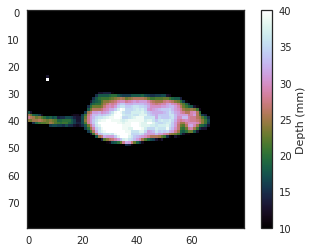

In [11]:
fig, ax = plt.subplots(1)
h = ax.imshow(frames[-1], vmin=10, vmax=40, cmap='cubehelix')
plt.colorbar(h, ax=ax, label='Depth (mm)')

In [12]:
# to create spines, simply average the data across the width of the mouse (approx. 10 pixels from the middle in either direction)

r_center = frames.shape[1] // 2
spines = frames[:, r_center-10:r_center+10, :].mean(axis=1).T

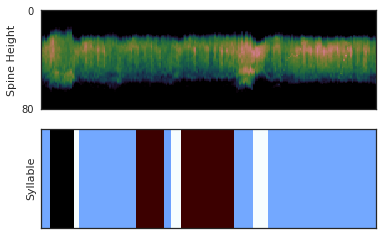

In [13]:
fig, ax = plt.subplots(2, 1)
ax[0].imshow(spines, aspect='auto', vmin=10, vmax=55, cmap='cubehelix')
ax[0].set_xlim(100, 300)
ax[0].set_xticks(())
ax[0].set_yticks([0, 80])
ax[0].set_ylabel('Spine Height')
ax[1].imshow(np.tile(use_labels, (100, 1)), aspect='auto', cmap='flag')
ax[1].set_xlim(100, 300)
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_ylabel('Syllable')
plt.show()

In [14]:
# get the transition matrix for the data

sorted_labels = relabel_by_usage(model_results['labels'])[0]
tm = get_transition_matrix(sorted_labels, combine=True, normalize='bigram')

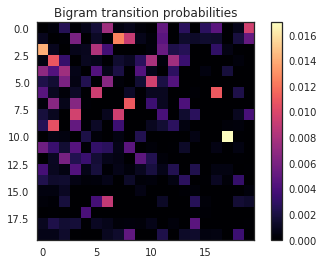

In [15]:
fig, ax = plt.subplots(1)
h = ax.imshow(tm[:20,:20], cmap='magma')
plt.colorbar(h, ax=ax)
ax.set_title('Bigram transition probabilities')
plt.show()